# **Initial Setup**

In [ ]:
import dask.dataframe as dd
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import gc as gc

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Import Data**

In [ ]:
file_path_training = "/content/gdrive/MyDrive/Project_NAPS/NAPS/data/processed-data.csv"
# Read Parquet data into a Dask DataFrame
df = pd.read_csv(file_path_training, nrows=17280)#, nparitions=10) #accidental wrong naming from dask dataframes experiments

print(df.head())

   Unnamed: 0     series_id  step            timestamp   anglez    enmo  \
0           0  08db4255286f     0  2018-11-05 14:00:00  30.8453  0.0447   
1           1  08db4255286f     1  2018-11-05 14:00:05  34.1818  0.0443   
2           2  08db4255286f     2  2018-11-05 14:00:10  33.8771  0.0483   
3           3  08db4255286f     3  2018-11-05 14:00:15  34.2821  0.0680   
4           4  08db4255286f     4  2018-11-05 14:00:20  34.3858  0.0768   

   awake  hour  anglez_diff  enmo_diff  anglez_rolling_mean  \
0      1    14        -5.98     0.0184                30.77   
1      1    14        -5.98     0.0184                30.77   
2      1    14        -5.98     0.0184                30.77   
3      1    14        -5.98     0.0184                30.77   
4      1    14        -5.98     0.0184                30.77   

   enmo_rolling_mean  anglez_rolling_max  enmo_rolling_max  \
0            0.05838               34.94            0.1073   
1            0.05838               34.94      

In [ ]:
features = ["hour",
            "awake",
            "anglez",
            "anglez_rolling_mean",
            "anglez_rolling_max",
            "anglez_rolling_std",
            "anglez_diff",
            "anglez_diff_rolling_mean",
            "anglez_diff_rolling_max",
            "enmo",
            "enmo_rolling_mean",
            "enmo_rolling_max",
            "enmo_rolling_std",
            "enmo_diff",
            "enmo_diff_rolling_mean",
            "enmo_diff_rolling_max",
           ]
features.remove("hour")
X_df = df[features]
T_df = df["step"]*5

# remove df from memory since no longer needed
del df
gc.collect();

# **Plotting Data**

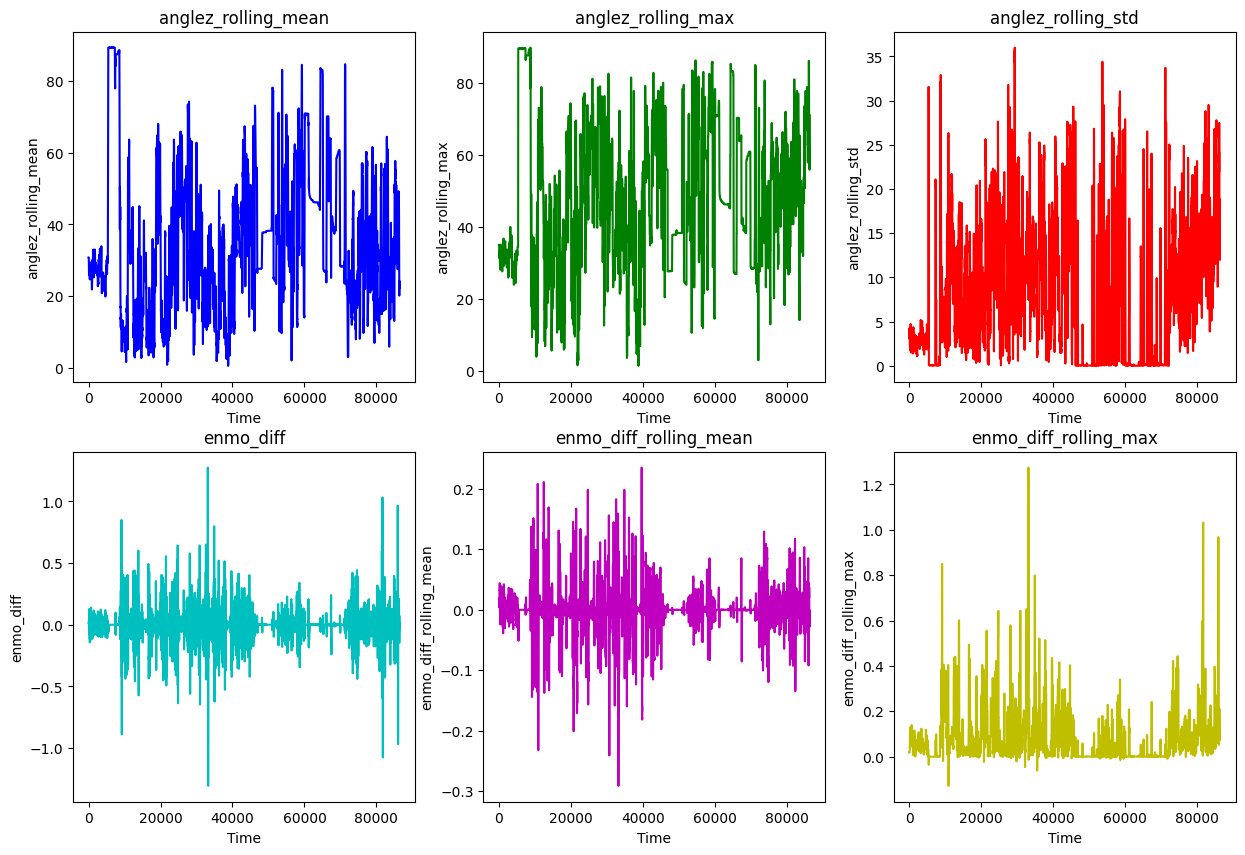

In [ ]:
import matplotlib.pyplot as plt

features2 = [
            "anglez_rolling_mean",
            "anglez_rolling_max",
            "anglez_rolling_std",
            "enmo_diff",
            "enmo_diff_rolling_mean",
            "enmo_diff_rolling_max",
           ]

# Create a figure and axis object
#fig, axs = plt.subplots(nrows=len(features2), sharex=True, figsize=(10, 10))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot each feature in a separate subplot
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i, feature in enumerate(features2):
    row = i // 3
    col = i % 3
    axs[row, col].plot(T_df, X_df[feature], color=colors[i%len(colors)])
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel(feature)

# Add additional spacing between subplots
#plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

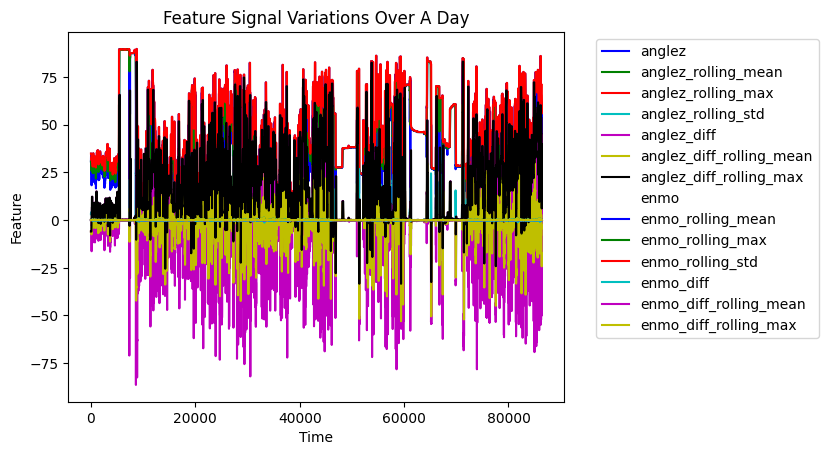

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each feature with a different color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, feature in enumerate(features):
    ax.plot(T_df, X_df[feature], color=colors[i%len(colors)], label=feature)

# Set the title, x-axis label, and y-axis label
ax.set_title('Feature Signal Variations Over A Day')
ax.set_xlabel('Time')
ax.set_ylabel('Feature')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()

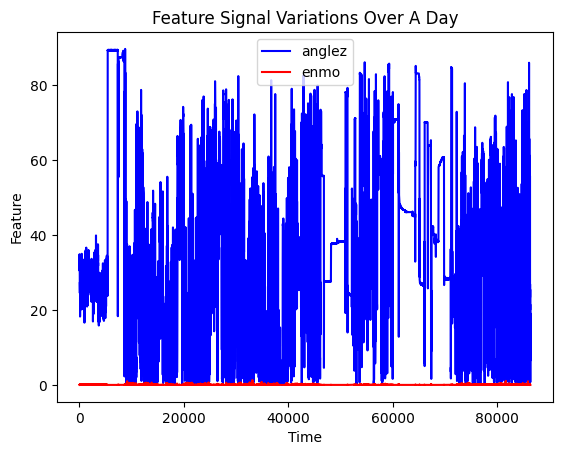

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the "anglez" feature in blue
ax.plot(T_df, X_df["anglez"], color='b', label='anglez')

# Plot the "enmo" feature in red
ax.plot(T_df, X_df["enmo"], color='r', label='enmo')

# Set the title, x-axis label, and y-axis label
ax.set_title('Feature Signal Variations Over A Day')
ax.set_xlabel('Time')
ax.set_ylabel('Feature')

# Add a legend
ax.legend()

# Show the plot
plt.show()

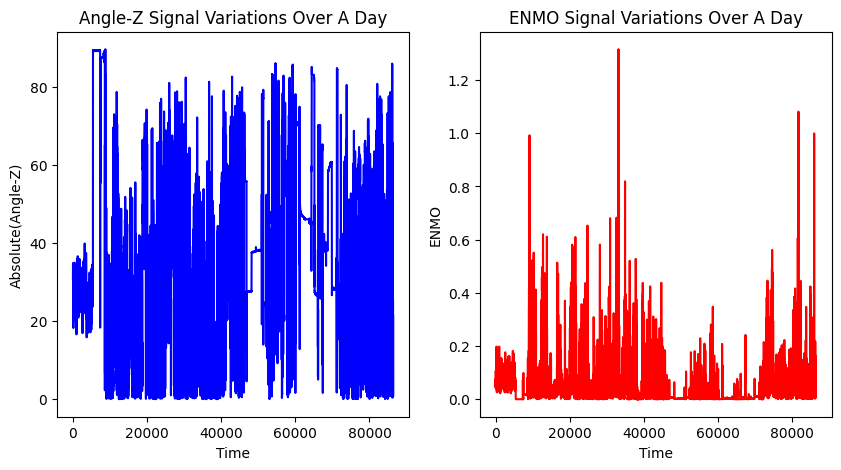

In [ ]:
# Create a figure and axis object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the "anglez" feature in the first graph
ax1.plot(T_df, X_df["anglez"], color='b')
ax1.set_title('Angle-Z Signal Variations Over A Day')
ax1.set_xlabel('Time')
ax1.set_ylabel('Absolute(Angle-Z)')

# Plot the "enmo" feature in the second graph
ax2.plot(T_df, X_df["enmo"], color='r')
ax2.set_title('ENMO Signal Variations Over A Day')
ax2.set_xlabel('Time')
ax2.set_ylabel('ENMO')

# Show the plot
plt.show()

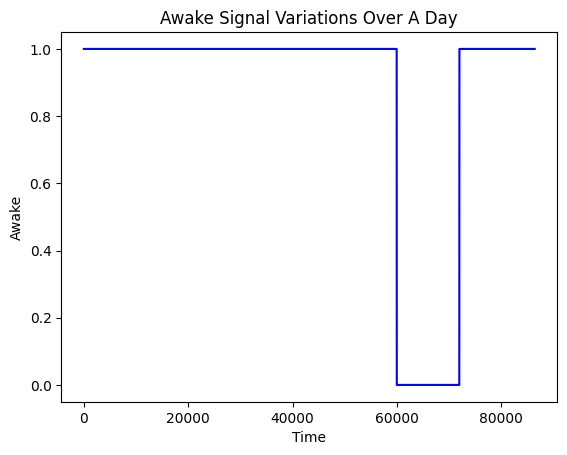

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the "awake" feature
ax.plot(T_df, X_df["awake"], color='b')

# Set the title, x-axis label, and y-axis label
ax.set_title('Awake Signal Variations Over A Day')
ax.set_xlabel('Time')
ax.set_ylabel('Awake')

# Show the plot
plt.show()

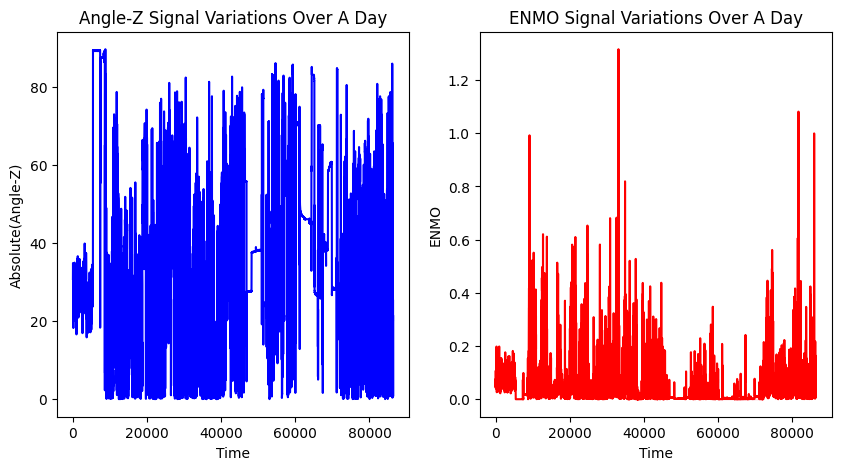

In [ ]:
import numpy as np

# Create a figure and axis object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the "anglez" feature in the first graph
ax1.plot(T_df, X_df["anglez"], color='b')
ax1.set_title('Angle-Z Signal Variations Over A Day')
ax1.set_xlabel('Time')
ax1.set_ylabel('Absolute(Angle-Z)')

# Plot the "enmo" feature in the second graph
ax2.plot(T_df, X_df["enmo"], color='r')
ax2.set_title('ENMO Signal Variations Over A Day')
ax2.set_xlabel('Time')
ax2.set_ylabel('ENMO')

# Highlight the area where the value of "awake" is 0
mask = X_df["awake"] == 0
ax2.fill_between(T_df, 0, X_df["enmo"], where=mask, color='pink', alpha=0.5)

# Show the plot
plt.show()

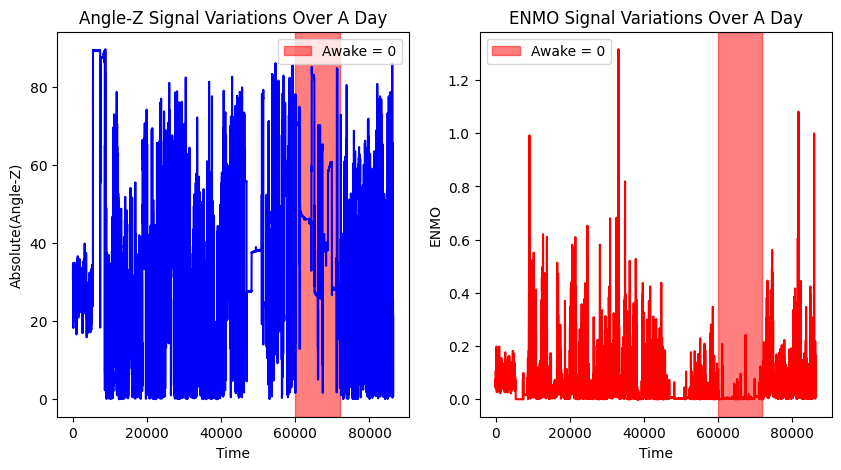

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select the first 17280 rows from X_df
X_df = X_df.iloc[:17280]

# Create a figure and axis object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the "anglez" feature in the first graph
ax1.plot(T_df, X_df["anglez"], color='b')
ax1.set_title('Angle-Z Signal Variations Over A Day')
ax1.set_xlabel('Time')
ax1.set_ylabel('Absolute(Angle-Z)')

# Plot the "enmo" feature in the second graph
ax2.plot(T_df, X_df["enmo"], color='r')
ax2.set_title('ENMO Signal Variations Over A Day')
ax2.set_xlabel('Time')
ax2.set_ylabel('ENMO')

# Highlight the range where the value of "awake" is 0
mask = X_df["awake"] == 0
ax1.axvspan(T_df[mask].iloc[0], T_df[mask].iloc[-1], color='red', alpha=0.5, label='Awake = 0')
ax2.axvspan(T_df[mask].iloc[0], T_df[mask].iloc[-1], color='red', alpha=0.5, label='Awake = 0')

# Add a legend
ax1.legend()
ax2.legend()

# Show the plot
plt.show()